```sir <input_file>```

In [1]:
!echo "{\"outfile\": \"output.csv\", \"S0\": 997, \"I0\": 3, \"beta\": 0.2, \"gamma\": 0.04, \"iterations\": 100}" > input.json

In [2]:
!./sir input.json

In [3]:
!cat output.csv

S,I,R,r0,t
996.4018,3.47784108,0.1391136432,4982.009,1
995.7087475755611,4.0312978050411745,0.300365555401647,4978.543737877805,2
994.905980318425,4.672165937353743,0.4872521928957967,4974.5299015921255,3
993.9763679472093,5.4140230672294996,0.7038131155849767,4969.8818397360465,4
992.9001871310173,6.27247777694467,0.9547122266627635,4964.500935655087,5
991.654756898651,7.2654467105291545,1.2453300950839297,4958.273784493255,6
990.2140324288114,8.413460157063296,1.5818685013664615,4951.070162144058,7
988.548155936764,9.739995672478827,1.9714683282656145,4942.740779683821,8
986.6229648025937,11.27183768247915,2.4223418355647803,4933.11482401297,9
984.3994591921578,13.039458775963833,2.9439201866033335,4921.997295960789,10
981.8332344074755,15.077415334289128,3.547016799974899,4909.166172037378,11
978.873887308794,17.424746040818373,4.244006641607633,4894.369436543971,12
975.4644116481677,20.125356454378117,5.049020899782758,4877.3220582408385,13
971.5406043345309,23.22836598801082,5.978

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('output.csv')

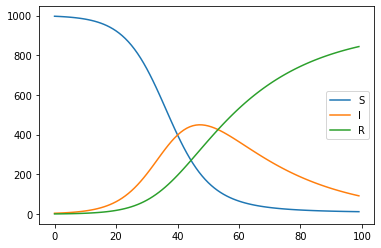

In [5]:
plt.plot(df['S'], label='S')
plt.plot(df['I'], label='I')
plt.plot(df['R'], label='R')
plt.legend()

In [6]:
import easyvvuq as uq
import chaospy as cp
import matplotlib.pyplot as plt

In [7]:
params = {
    "S0": {"type": "float", "default": 997}, 
    "I0": {"type": "float", "default": 3}, 
    "beta": {"type": "float", "default": 0.2}, 
    "gamma": {"type": "float", "default": 0.04, "min": 0.0, "max": 1.0},
    "iterations": {"type": "integer", "default": 100},
    "outfile": {"type": "string", "default": "output.json"}
}

In [8]:
encoder = uq.encoders.GenericEncoder(template_fname='sir.template', delimiter='$', target_filename='input.json')
decoder = uq.decoders.SimpleCSV(target_filename='output.json', output_columns=['I'])

In [9]:
campaign = uq.Campaign(name='sir', params=params, encoder=encoder, decoder=decoder)

In [10]:
vary = {
    "beta": cp.Uniform(0.1, 0.3),
    "gamma": cp.Normal(0.04, 0.01),
}

In [11]:
campaign.set_sampler(uq.sampling.PCESampler(vary=vary, polynomial_order=3))

In [12]:
execution = campaign.sample_and_apply(action=uq.actions.ExecuteLocalV2("sir input.json"), batch_size=8)

In [13]:
execution.start()

[<Future at 0x1136c0580 state=running>,
 <Future at 0x1136c03a0 state=running>,
 <Future at 0x11e775940 state=running>,
 <Future at 0x11e775700 state=running>,
 <Future at 0x11e7757c0 state=running>,
 <Future at 0x11e77a700 state=running>,
 <Future at 0x11e7861f0 state=running>,
 <Future at 0x11e7865b0 state=running>,
 <Future at 0x11e7869d0 state=pending>,
 <Future at 0x11e786a60 state=pending>,
 <Future at 0x11e786b50 state=pending>,
 <Future at 0x11e786c40 state=pending>,
 <Future at 0x11e786d30 state=pending>,
 <Future at 0x11e786e20 state=pending>,
 <Future at 0x11e786f10 state=pending>,
 <Future at 0x11e78b040 state=pending>]

In [15]:
execution.progress()

{'ready': 0, 'active': 0, 'finished': 16, 'failed': 0}

In [16]:
result = campaign.analyse(qoi_cols=['I'])

/Users/di73kuj2/Programming/EasyVVUQ/easyvvuq/analysis/results.py:454: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<AxesSubplot:xlabel='x-axis', ylabel='First Order Sobol Index'>

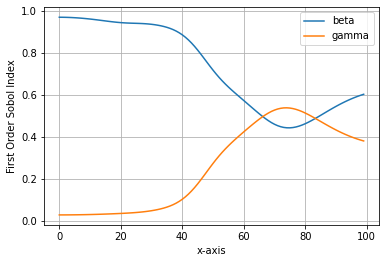

In [17]:
result.plot_sobols_first('I')

/Users/di73kuj2/Programming/EasyVVUQ/easyvvuq/analysis/results.py:524: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<AxesSubplot:xlabel='x-axis', ylabel='I'>

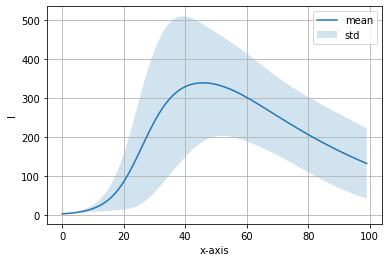

In [18]:
result.plot_moments('I')